<a href="https://colab.research.google.com/github/MizeroR/linear_regression_model/blob/main/maputo_water_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Usage Efficiency Prediction Model
Predicting water usage efficiency based on weather conditions in Maputo

## Mission Statement
My mission is to optimize water usage efficiency in cooling systems by predicting water consumption rates based on weather conditions in Maputo. This model helps facilities and industrial operations minimize water waste while maintaining optimal cooling performance, supporting sustainable water resource management in urban environments.

**Objective**: Predict water usage efficiency (L/KWh) using weather parameters to enable proactive water management and reduce environmental impact.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [69]:
df = pd.read_csv('Maputo.csv')
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (8784, 27)


,timestamp,city,temperature,precipitation,wind_speed,humidity,country,wetbulb_temperature,climate_region,Other renewables (including geothermal and biomass) - TWh,...,Oil consumption - TWh,Total renewables - TWh,Total fossil fuels - TWh,Total energy - TWh,Low carbon - TWh,Other - TWh,WUE_FixedApproachDirect(L/KWh),WUE_FixedColdWaterDirect(L/KWh),WUE_Indirect(L/KWh),Leakages (%)
0,2022-08-20 00:00:00,Maputo,14.2,0.0,13.3,71,Mozambique,51.774857,Savana,0.000002,...,0.0,312144.288121,66731.548513,378875.836634,312144.288121,0.0,1.538383,1.177918,4.666931,0.37
1,2022-08-20 01:00:00,Maputo,14.0,0.0,11.4,71,Mozambique,51.438369,Savana,0.000002,...,0.0,312144.288121,66731.548513,378875.836634,312144.288121,0.0,1.534554,1.176928,4.666931,0.37
2,2022-08-20 02:00:00,Maputo,13.9,0.0,9.5,70,Mozambique,51.077297,Savana,0.000002,...,0.0,312144.288121,66731.548513,378875.836634,312144.288121,0.0,1.530397,1.175994,4.666931,0.37
3,2022-08-20 03:00:00,Maputo,13.7,0.0,7.6,70,Mozambique,50.741900,Savana,0.000002,...,0.0,312144.288121,66731.548513,378875.836634,312144.288121,0.0,1.526491,1.175246,4.666931,0.37
4,2022-08-20 04:00:00,Maputo,13.6,0.0,6.4,68,Mozambique,50.192227,Savana,0.000002,...,0.0,312144.288121,66731.548513,378875.836634,312144.288121,0.0,1.519998,1.174269,4.666931,0.37


## Data info and basic statistics


In [54]:
print('Dataset Info:')
print(df.info())
print('\nBasic Statistics:')
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 27 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   timestamp                                                  8784 non-null   object 
 1   city                                                       8784 non-null   object 
 2   temperature                                                8784 non-null   float64
 3   precipitation                                              8784 non-null   float64
 4   wind_speed                                                 8784 non-null   float64
 5   humidity                                                   8784 non-null   int64  
 6   country                                                    8784 non-null   object 
 7   wetbulb_temperature                                        8784 non-null   float64

,temperature,precipitation,wind_speed,humidity,wetbulb_temperature,Other renewables (including geothermal and biomass) - TWh,Biofuels consumption - TWh,Solar consumption - TWh,Wind consumption - TWh,Hydro consumption - TWh,...,Oil consumption - TWh,Total renewables - TWh,Total fossil fuels - TWh,Total energy - TWh,Low carbon - TWh,Other - TWh,WUE_FixedApproachDirect(L/KWh),WUE_FixedColdWaterDirect(L/KWh),WUE_Indirect(L/KWh),Leakages (%)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8.784000e+03,8784.0,8784.00000,...,8784.0,8.784000e+03,8784.000000,8.784000e+03,8.784000e+03,8784.0,8784.000000,8784.000000,8.784000e+03,8.784000e+03
mean,23.315585,0.092443,13.378632,70.783128,66.779449,0.000002,0.000002,1.394391e+03,0.0,308558.71238,...,0.0,3.121443e+05,66731.548513,3.788758e+05,3.121443e+05,0.0,1.658230,1.359353,4.666931e+00,3.700000e-01
std,4.122106,0.452124,5.679828,15.926657,6.194248,0.000000,0.000000,2.273866e-13,0.0,0.00000,...,0.0,5.821097e-11,0.000000,5.821097e-11,5.821097e-11,0.0,0.039138,0.107649,8.882290e-16,1.110286e-16
min,11.500000,0.000000,0.400000,14.000000,45.945405,0.000002,0.000002,1.394391e+03,0.0,308558.71238,...,0.0,3.121443e+05,66731.548513,3.788758e+05,3.121443e+05,0.0,1.465968,1.173174,4.666931e+00,3.700000e-01
25%,20.500000,0.000000,9.000000,60.000000,62.316809,0.000002,0.000002,1.394391e+03,0.0,308558.71238,...,0.0,3.121443e+05,66731.548513,3.788758e+05,3.121443e+05,0.0,1.636616,1.267563,4.666931e+00,3.700000e-01
50%,23.100000,0.000000,13.200000,73.000000,67.885682,0.000002,0.000002,1.394391e+03,0.0,308558.71238,...,0.0,3.121443e+05,66731.548513,3.788758e+05,3.121443e+05,0.0,1.671497,1.360783,4.666931e+00,3.700000e-01
75%,26.100000,0.000000,17.200000,84.000000,71.582997,0.000002,0.000002,1.394391e+03,0.0,308558.71238,...,0.0,3.121443e+05,66731.548513,3.788758e+05,3.121443e+05,0.0,1.688160,1.440188,4.666931e+00,3.700000e-01
max,37.300000,9.300000,35.300000,97.000000,81.311682,0.000002,0.000002,1.394391e+03,0.0,308558.71238,...,0.0,3.121443e+05,66731.548513,3.788758e+05,3.121443e+05,0.0,1.707239,1.715897,4.666931e+00,3.700000e-01


# Visualize Distribution

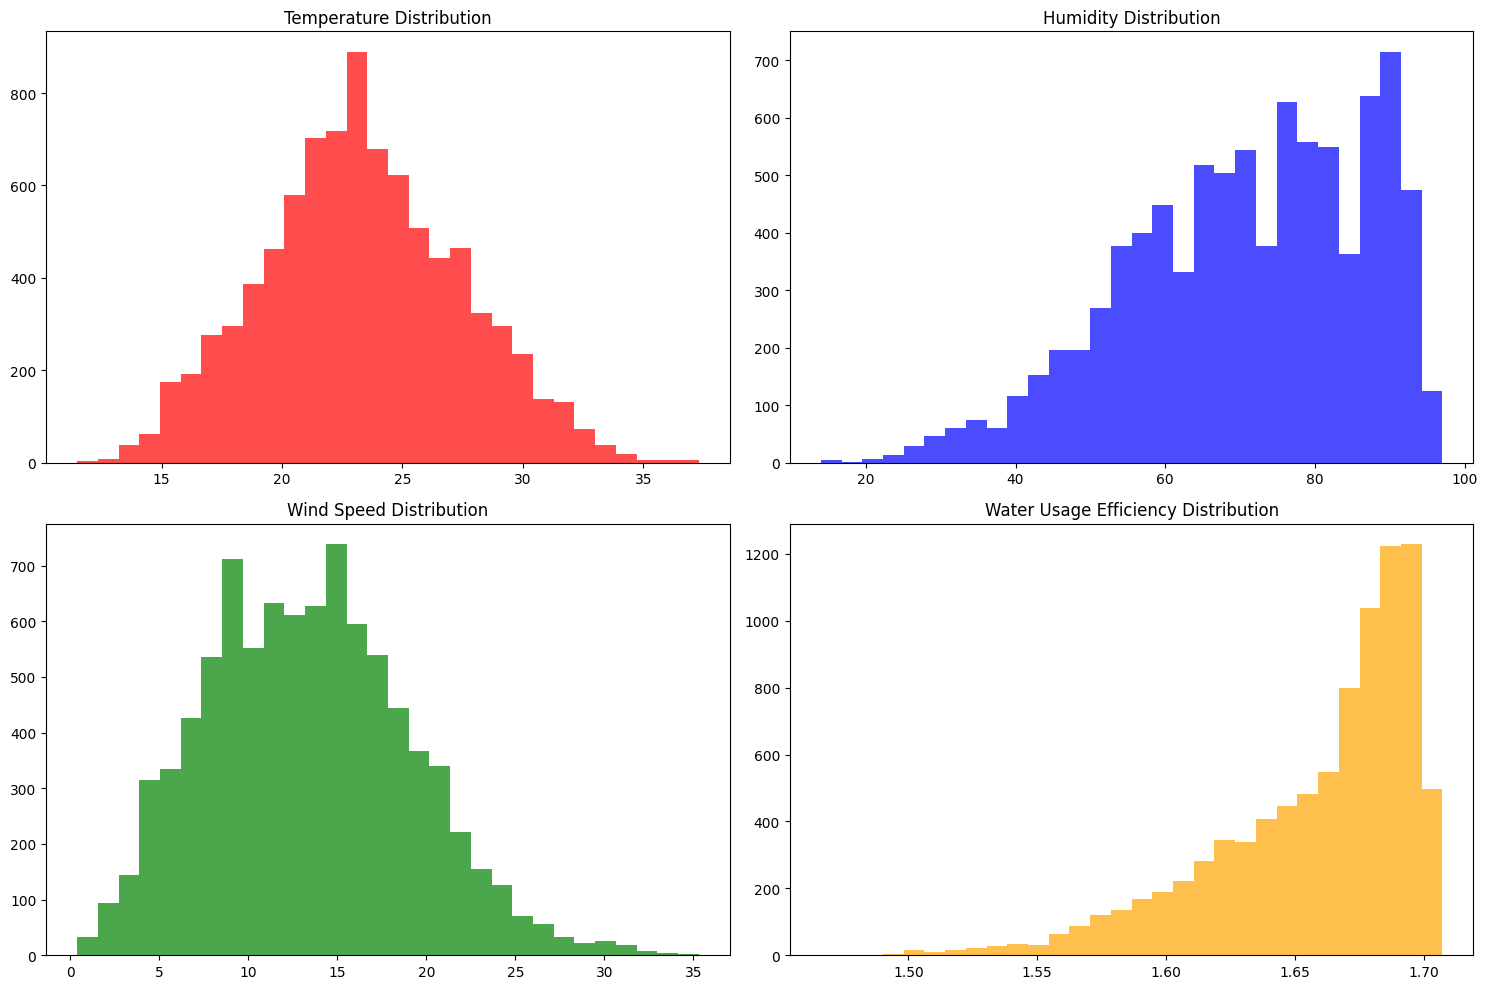

In [70]:
# Visualize key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperature distribution
axes[0,0].hist(df['temperature'], bins=30, alpha=0.7, color='red')
axes[0,0].set_title('Temperature Distribution')

# Humidity distribution
axes[0,1].hist(df['humidity'], bins=30, alpha=0.7, color='blue')
axes[0,1].set_title('Humidity Distribution')

# Wind speed distribution
axes[1,0].hist(df['wind_speed'], bins=30, alpha=0.7, color='green')
axes[1,0].set_title('Wind Speed Distribution')

# Water efficiency distribution
axes[1,1].hist(df['WUE_FixedApproachDirect(L/KWh)'], bins=30, alpha=0.7, color='orange')
axes[1,1].set_title('Water Usage Efficiency Distribution')

plt.tight_layout()
plt.show()

# Correlation Heatmap


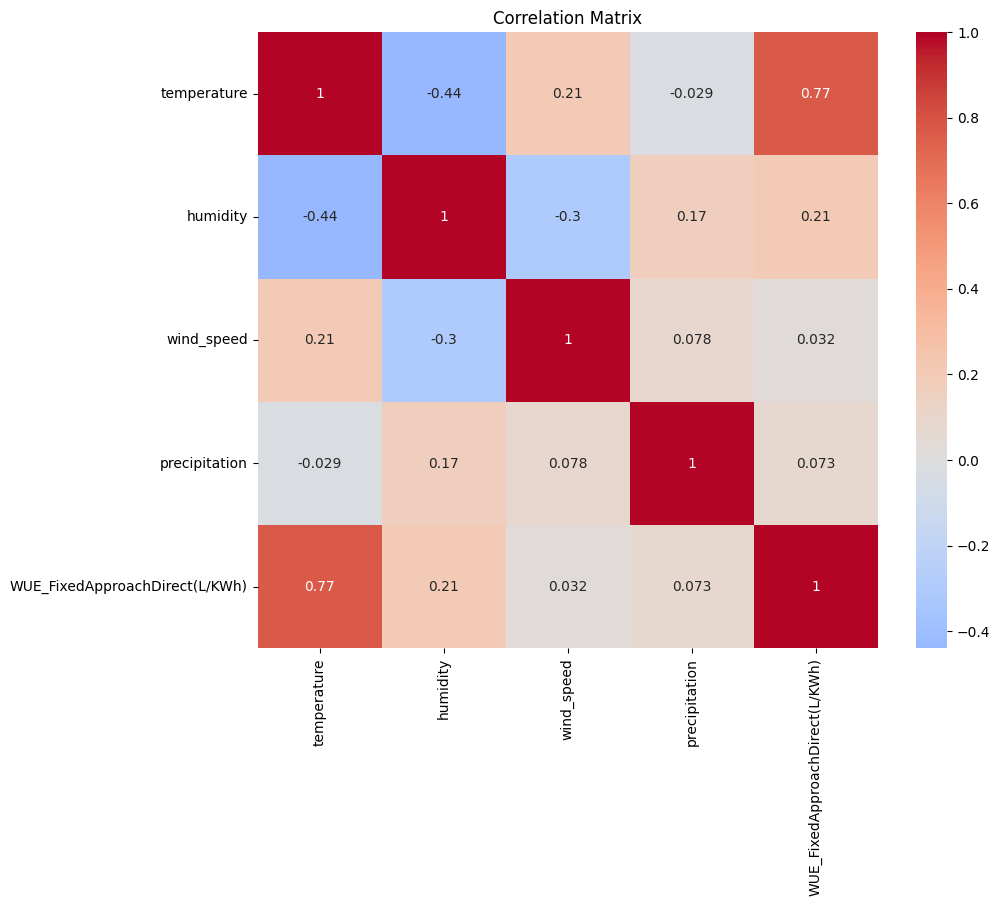

In [71]:
features_for_corr = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'WUE_FixedApproachDirect(L/KWh)']
plt.figure(figsize=(10, 8))
correlation_matrix = df[features_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering and Data Preparation

In [72]:
features = ['temperature', 'humidity', 'wind_speed', 'precipitation']
target = 'WUE_FixedApproachDirect(L/KWh)'

# Clean the data
df_clean = df[features + [target]].dropna()

# Convert to numeric (already numeric but ensuring)
for col in features + [target]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean = df_clean.dropna()
print(f'Final dataset shape: {df_clean.shape}')

Final dataset shape: (8784, 5)


## Split features and targets


In [58]:
# Prepare features and target
X = df_clean[features]
y = df_clean[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Training set shape: {X_train_scaled.shape}')
print(f'Test set shape: {X_test_scaled.shape}')

Training set shape: (7027, 4)
Test set shape: (1757, 4)


## Linear Regression with Gradient Descent

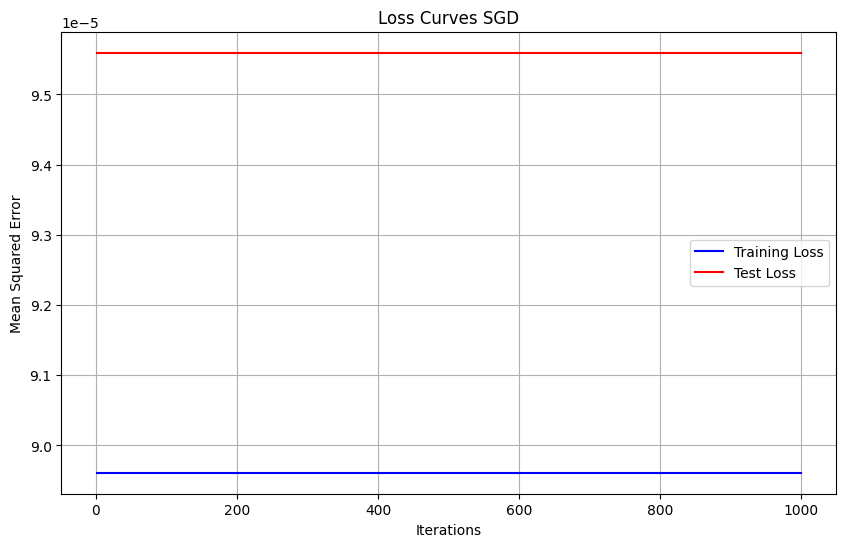

In [84]:
sgd_model = SGDRegressor(
    max_iter=1, tol=None, learning_rate='constant',
    eta0=0.1, random_state=42
)

sgd_model.partial_fit(X_train_scaled, y_train)

train_losses = []
test_losses = []
iterations = range(1, 1001)

for i in iterations:
    sgd_model.partial_fit(X_train_scaled, y_train)
    train_pred = sgd_model.predict(X_train_scaled)
    test_pred = sgd_model.predict(X_test_scaled)

    train_loss = mean_squared_error(y_train, train_pred)
    test_loss = mean_squared_error(y_test, test_pred)

    train_losses.append(train_loss)
    test_losses.append(test_loss)


# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_losses, label='Training Loss', color='blue')
plt.plot(iterations, test_losses, label='Test Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curves SGD')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
sgd_pred = sgd_model.predict(X_test_scaled)




KeyboardInterrupt



: 

## Model Comparison: Linear Regression, Decision Trees, Random Forest

Model Performance Comparison:
--------------------------------------------------
Linear Regression:
  MSE: 0.000074
  R²:  0.951544

Decision Tree:
  MSE: 0.000005
  R²:  0.996466

Random Forest:
  MSE: 0.000002
  R²:  0.998610

SGD Regressor:
  MSE: 0.000077
  R²:  0.949063



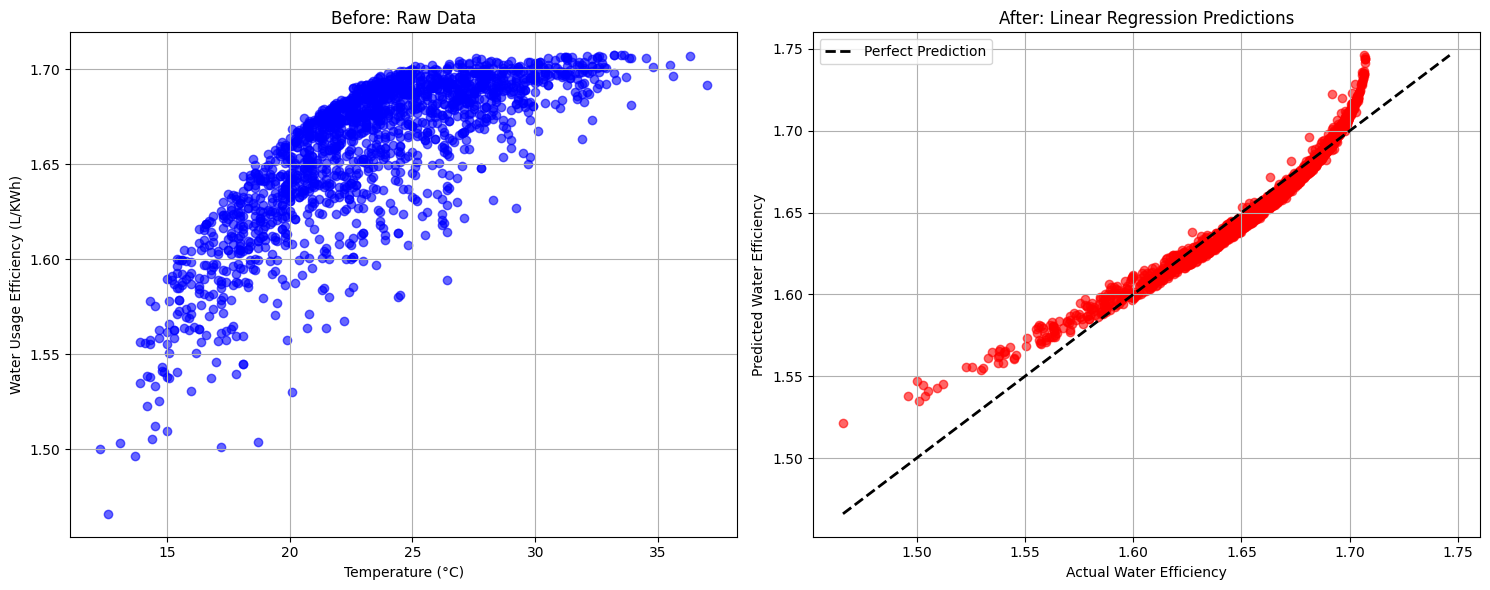

Best performing model: Random Forest (R² = 0.998610)


In [78]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Linear Regression predictions (already trained)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Compare models
models = {
    'Linear Regression': {'pred': lr_pred, 'model': lr_model},
    'Decision Tree': {'pred': dt_pred, 'model': dt_model},
    'Random Forest': {'pred': rf_pred, 'model': rf_model},
    'SGD Regressor': {'pred': sgd_pred, 'model':sgd_model}
}

print("Model Performance Comparison:")
print("-" * 50)
best_model = None
best_r2 = -float('inf')

for name, data in models.items():
    mse = mean_squared_error(y_test, data['pred'])
    r2 = r2_score(y_test, data['pred'])
    print(f"{name}:")
    print(f"  MSE: {mse:.6f}")
    print(f"  R²:  {r2:.6f}")
    print()
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = (name, data['model'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(X_test['temperature'], y_test, alpha=0.6, color='blue')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Water Usage Efficiency (L/KWh)')
axes[0].set_title('Before: Raw Data')
axes[0].grid(True)

lr_pred = models['Linear Regression']['pred']
axes[1].scatter(y_test, lr_pred, alpha=0.6, color='red')
min_val = min(y_test.min(), lr_pred.min())
max_val = max(y_test.max(), lr_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Water Efficiency')
axes[1].set_ylabel('Predicted Water Efficiency')
axes[1].set_title('After: Linear Regression Predictions')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Best performing model: {best_model[0]} (R² = {best_r2:.6f})")

## Save best model and scaler

In [80]:
best_model_name, best_model_obj = best_model
print(f"\nBest model: {best_model_name} (R² = {best_r2:.4f})")

os.makedirs('../API/model', exist_ok=True)
joblib.dump(best_model_obj, '../API/model/water_efficiency_model.pkl')
joblib.dump(scaler, '../API/model/weather_scaler.pkl')
print(f"Model saved to '../API/model/water_efficiency_model.pkl'")
print(f"Scaler saved to '../API/model/weather_scaler.pkl'")

# Prediction function
def predict_water_efficiency(temperature, humidity, wind_speed, precipitation):
    model = joblib.load('../API/model/water_efficiency_model.pkl')
    scaler = joblib.load('../API/model/weather_scaler.pkl')

    input_data = np.array([[temperature, humidity, wind_speed, precipitation]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return prediction[0]

# Test the prediction
sample_temp = 25.0
sample_humidity = 60.0
sample_wind = 15.0
sample_precip = 0.1

predicted_efficiency = predict_water_efficiency(sample_temp, sample_humidity, sample_wind, sample_precip)

print(f'\nSample Prediction:')
print(f'Temperature: {sample_temp}°C')
print(f'Humidity: {sample_humidity}%')
print(f'Wind Speed: {sample_wind} km/h')
print(f'Precipitation: {sample_precip} mm')
print(f'Predicted Water Efficiency: {predicted_efficiency:.4f} L/KWh')



Best model: Random Forest (R² = 0.9986)
Model saved to '../API/model/water_efficiency_model.pkl'
Scaler saved to '../API/model/weather_scaler.pkl'

Sample Prediction:
Temperature: 25.0°C
Humidity: 60.0%
Wind Speed: 15.0 km/h
Precipitation: 0.1 mm
Predicted Water Efficiency: 1.6677 L/KWh
